In [1]:
import cv2
import PIL
from tools import display_inline, display_hist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'example.jpg'
img = cv2.imread(path)
window = 'img_1'

In [3]:
w, h, c = img.shape
scaler = 3
img = cv2.resize(img, (w // scaler, h // scaler))

In [4]:
img.shape

(356, 426, 3)

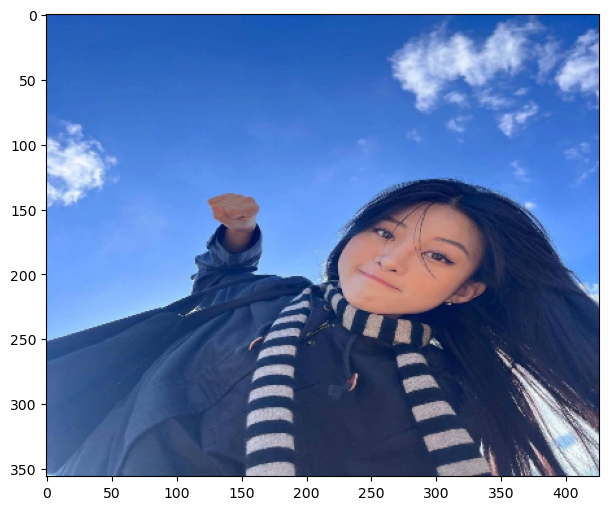

In [5]:
display_inline(img)

#### **Задание 1. Преобразования цветовых пространств**
1. Считать изображение в формате BGR.
2. Преобразовать его в HSV и LAB.
3. Выделить только канал Hue из HSV и канал L из LAB. Построить их гистограммы.

In [6]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

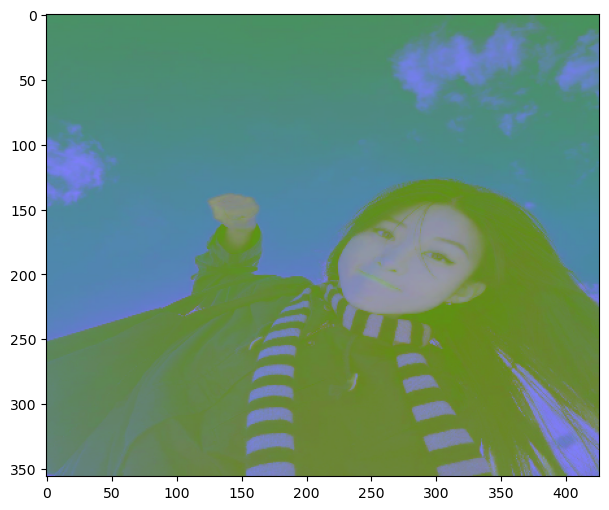

In [7]:
display_inline(img_lab)

In [8]:
hist_hue = cv2.calcHist([img_hsv], [0], None, [256], [0, 256])
hist_lab = cv2.calcHist([img_lab], [0], None, [256], [0, 256])

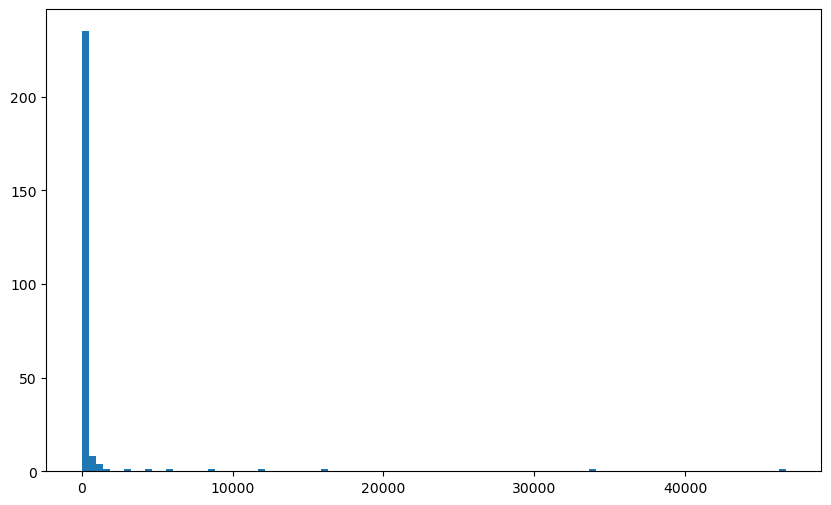

In [9]:
display_hist(hist_hue)
plt.show()

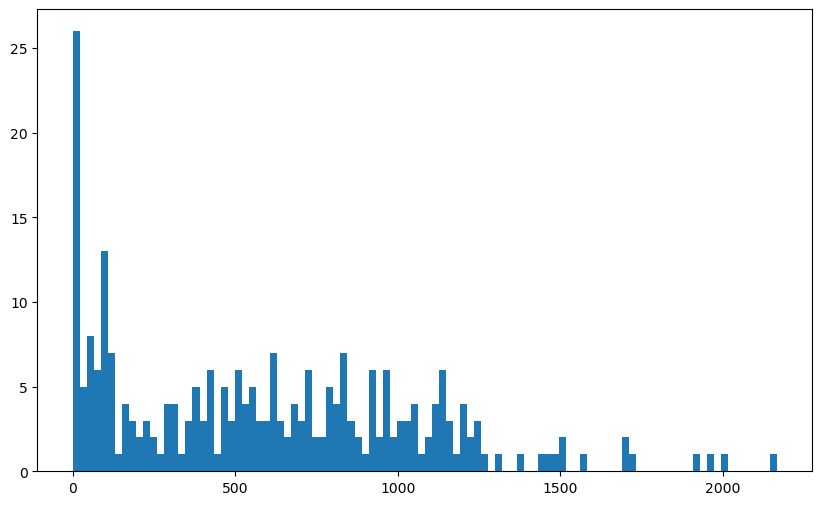

In [10]:
display_hist(hist_lab)
plt.show()

#### **Задание 2. Гистограммы цветовых пространств**
1. Построить гистограммы для каждого канала изображения в пространстве RGB.
2. Повторить то же для изображения, преобразованного в HSV.
3. Сравнить полученные гистограммы: в каком пространстве различия между цветами более явные?

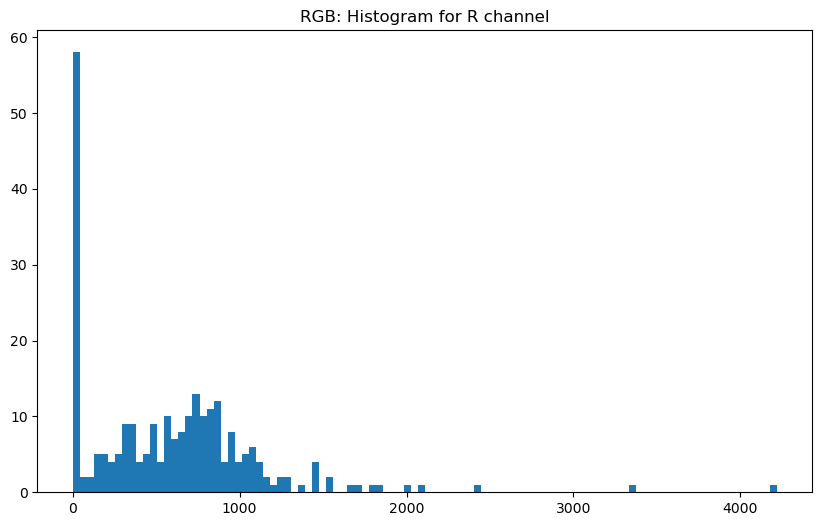

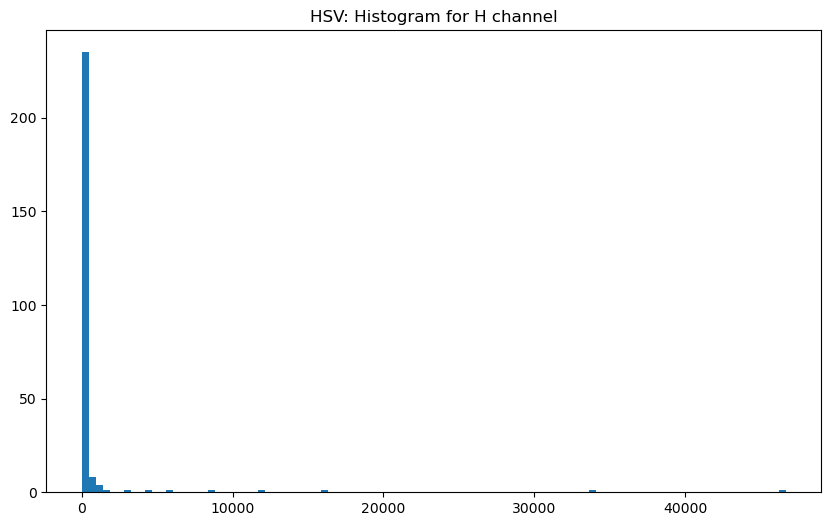

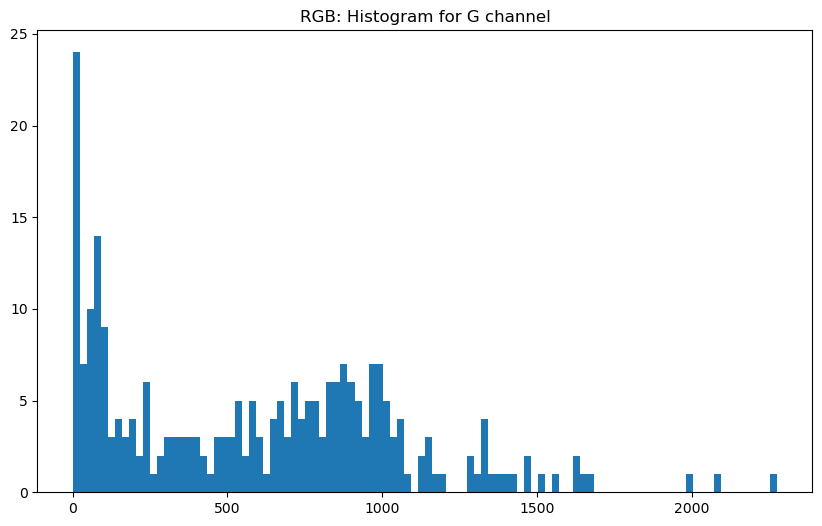

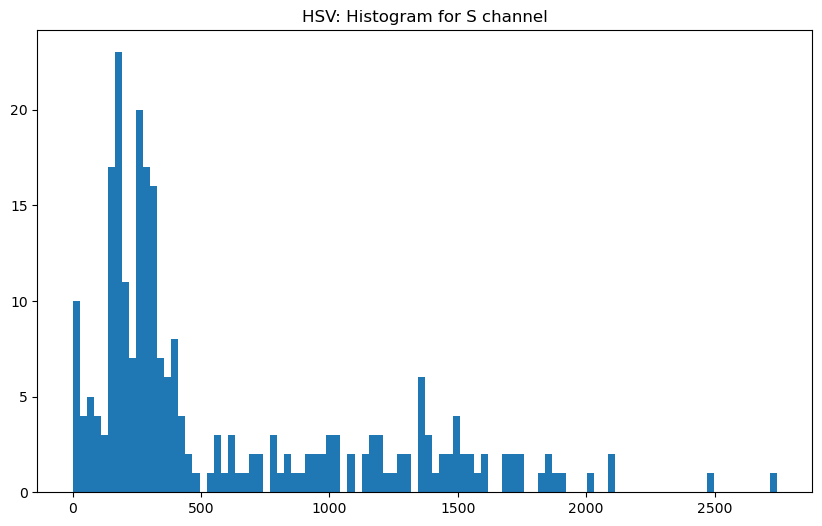

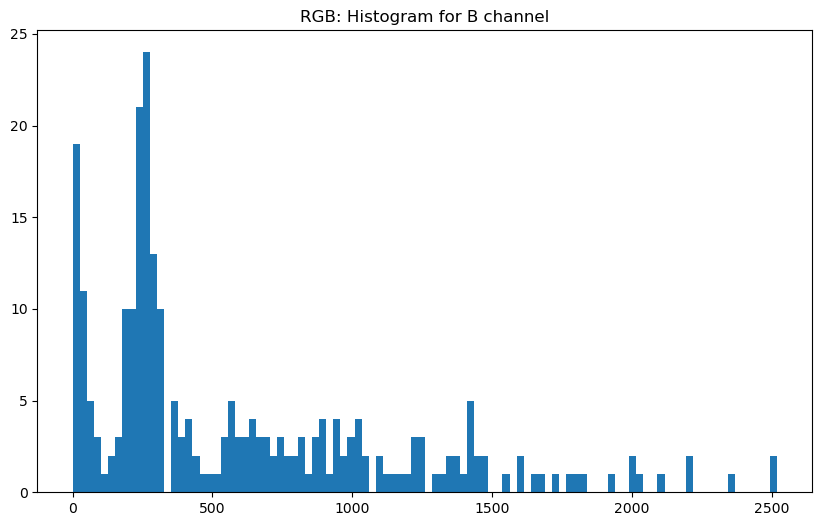

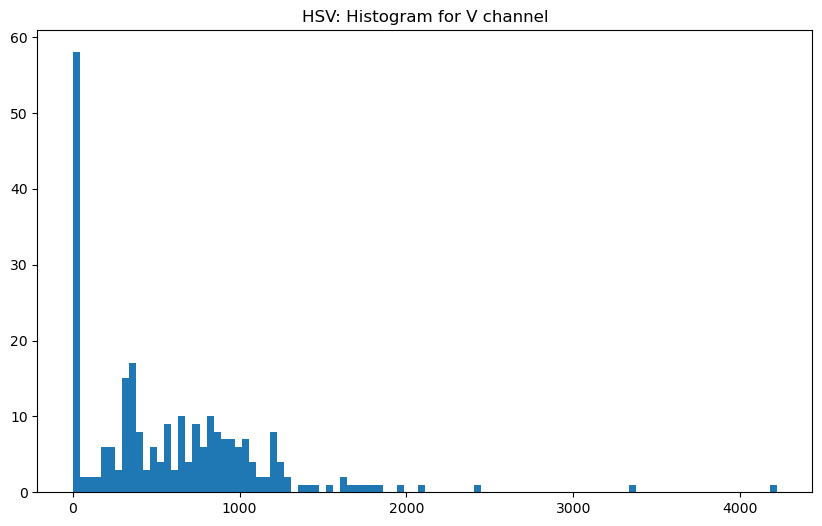

In [11]:
for i in range(3):
    hist_rgb = cv2.calcHist([img], [i], None, [256], [0, 256])
    display_hist(hist_rgb)
    plt.title(f'RGB: Histogram for {["R", "G", "B"][i]} channel')
    plt.show()
    
    hist_hsv = cv2.calcHist([img_hsv], [i], None, [256], [0, 256])
    display_hist(hist_hsv)
    plt.title(f'HSV: Histogram for {["H", "S", "V"][i]} channel')
    plt.show()
    

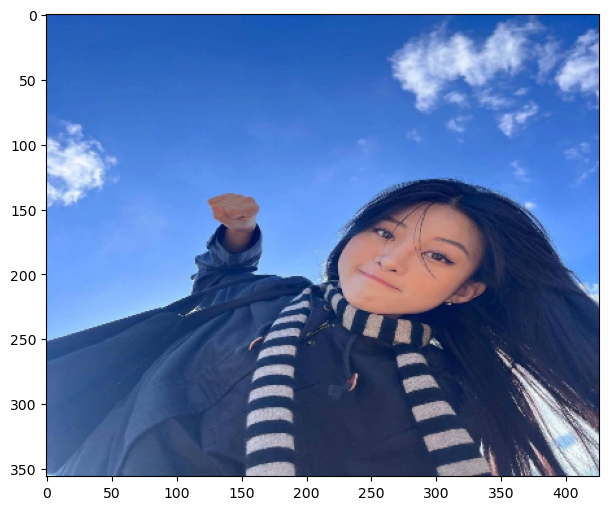

In [12]:
display_inline(img)

#### **Задание 3. Выравнивание гистограмм**
1. Считать изображение в градациях серого.
2. Построить гистограмму и выполнить выравнивание с помощью метода EqualizeHist.
3. Применить CLAHE с различными параметрами (`clipLimit=2.0`, `tileGridSize=(8,8)` и `tileGridSize=(4,4)`).
4. Сравнить визуальные результаты и гистограммы.

In [13]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [14]:
hist_grey = cv2.calcHist(img_grey, [0], None, [256], [0, 256])

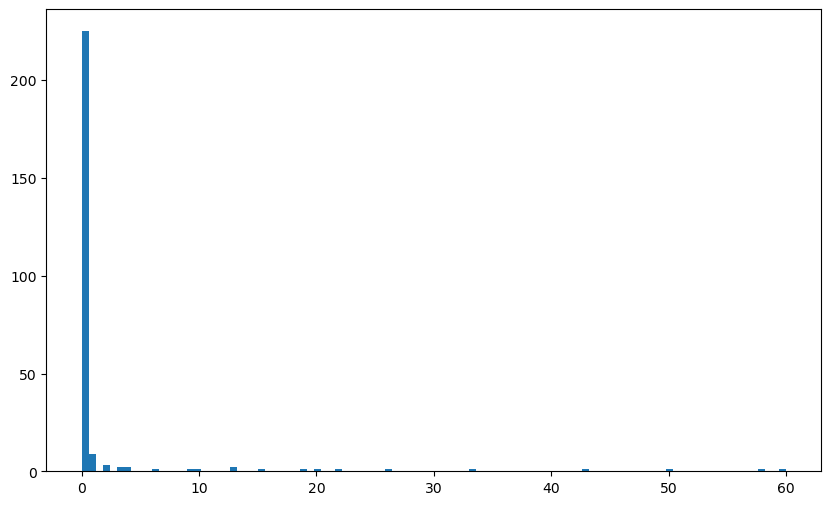

In [15]:
display_hist(hist_grey)
plt.show()

In [16]:
equ_grey = cv2.equalizeHist(img_grey)
res_grey = np.vstack([img_grey, equ_grey])

In [17]:
hist_grey_equ = cv2.calcHist(equ_grey, [0], None, [256], [0, 256])

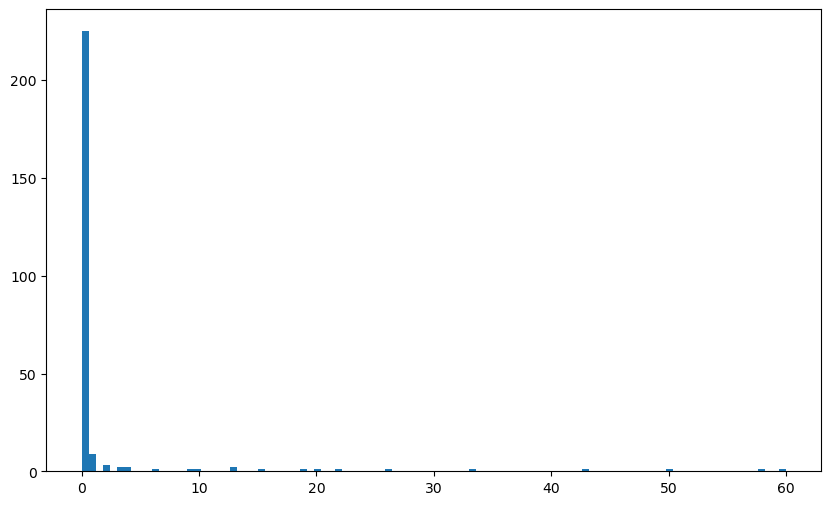

In [18]:
display_hist(hist_grey_equ)
plt.show()

In [19]:
clahe8 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
res_clahe8 = clahe8.apply(img_grey)

clahe4 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
res_clahe4 = clahe4.apply(img_grey)

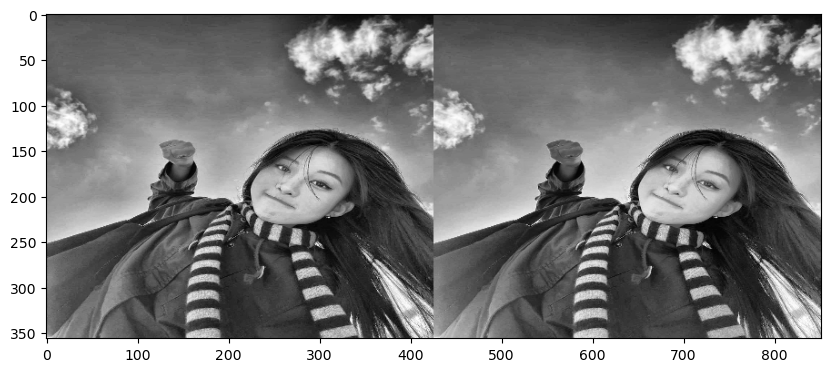

In [21]:
display_inline(np.hstack([res_clahe8, res_clahe4]), grey=True)

In [22]:
hist_clahe8 = cv2.calcHist(res_clahe8, [0], None, [256], [0, 256])
hist_clahe4 = cv2.calcHist(res_clahe4, [0], None, [256], [0, 256])

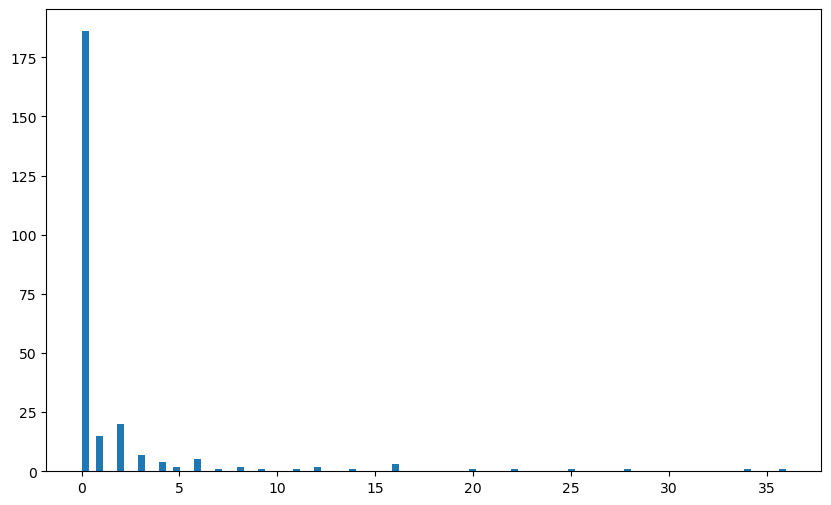

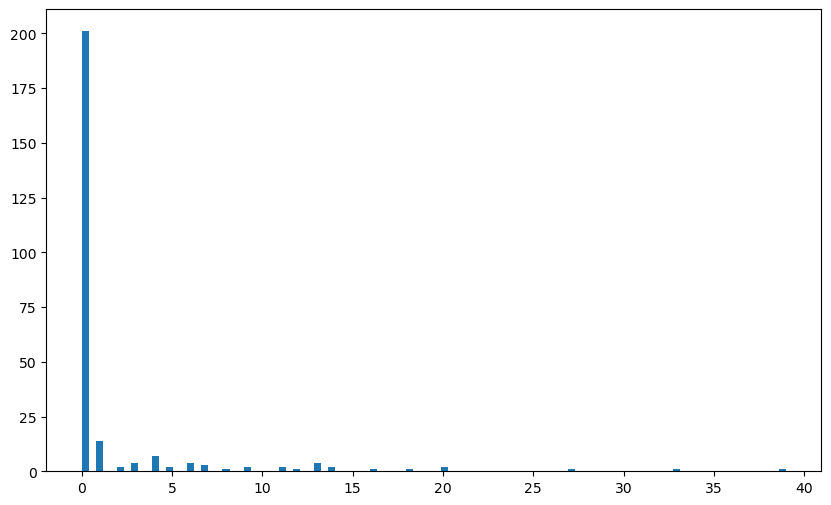

In [23]:
display_hist(hist_clahe8)
plt.show()

display_hist(hist_clahe4)
plt.show()

#### **Задание 4. Фиксированная пороговая сегментация**
1. Преобразовать изображение в градации серого.
2. Применить пороговую обработку с фиксированными значениями порога (50, 127, 200).
3. Визуально сравнить результаты и объяснить влияние порога на сегментацию.

In [24]:
ret, binary = cv2.threshold(img_grey, 50, 255, cv2.THRESH_BINARY)

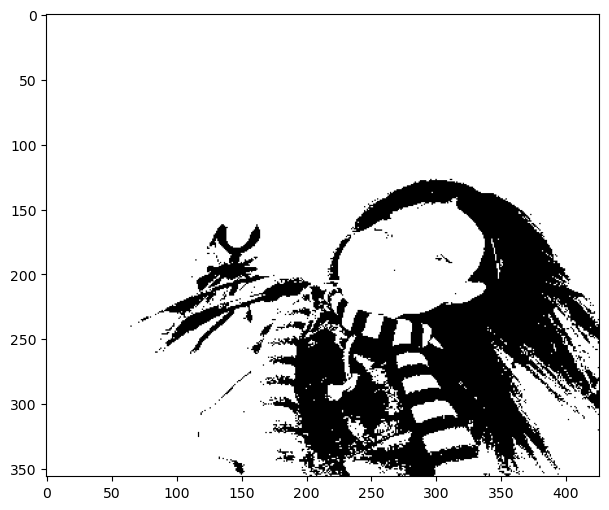

In [25]:
display_inline(binary, grey=True)

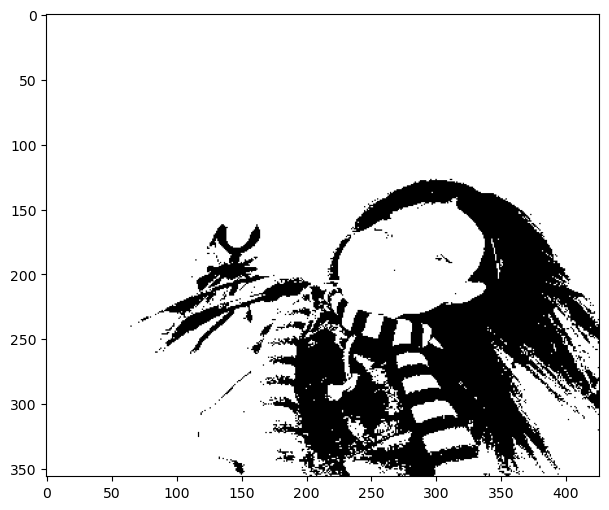

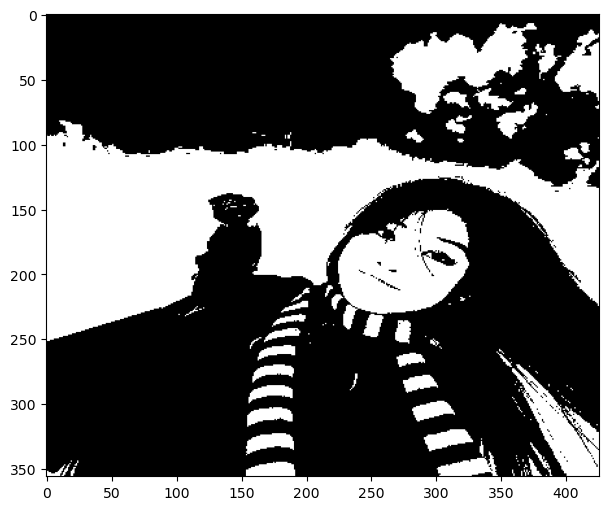

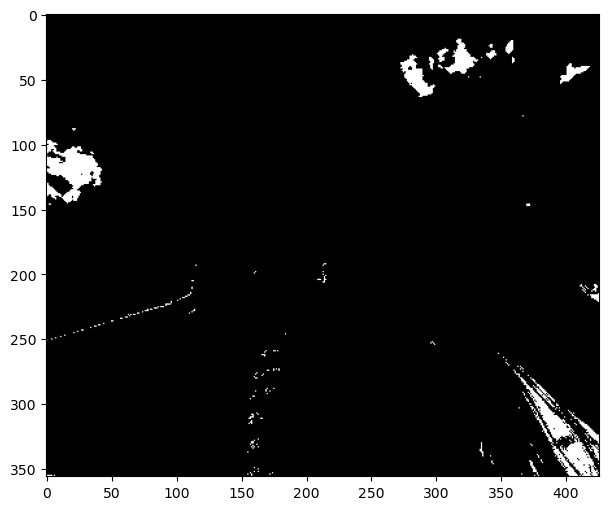

In [26]:
for threshold_val in (50, 127, 200):
    ret, binary = cv2.threshold(img_grey, threshold_val, 255, cv2.THRESH_BINARY)
    display_inline(binary, grey=True)


#### **Задание 5. Пороговая сегментация с Оцу**
1. Преобразовать изображение в градации серого.
2. Применить метод Оцу для автоматического выбора порога.
3. Сравнить результат с фиксированным порогом из задания 4.

In [29]:
ret, otsu_binary = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

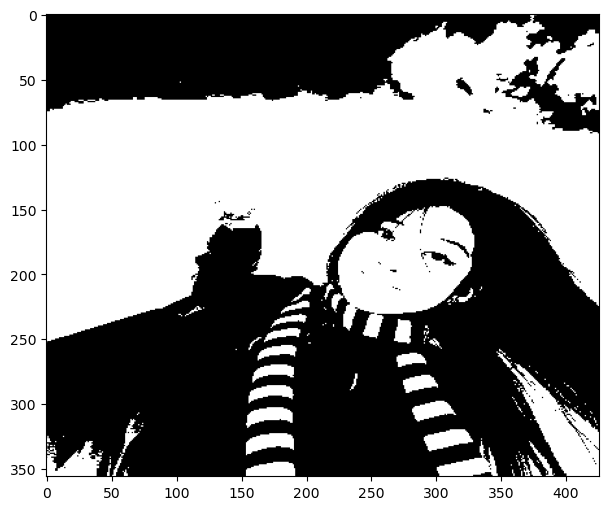

In [30]:
display_inline(otsu_binary, grey=True)


#### **Задание 6. Адаптивная пороговая обработка**
1. Преобразовать изображение в градации серого.
2. Применить адаптивную пороговую обработку с методами `cv2.ADAPTIVE_THRESH_MEAN_C` и `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`.
3. Визуально сравнить результаты с методом Оцу.


In [31]:
ret, mean_binary = cv2.threshold(img_grey, 0, 255, cv2.ADAPTIVE_THRESH_MEAN_C)
ret, gaussian_binary = cv2.threshold(img_grey, 0, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

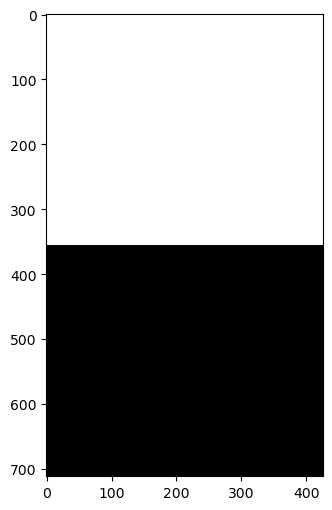

In [32]:
display_inline(np.vstack([mean_binary, gaussian_binary]), grey=True)

#### **Задание 7. Простая кластеризация K-means**
1. Считать цветное изображение и преобразовать его в формат LAB.
2. Выполнить кластеризацию K-means с количеством кластеров $k=3$.
3. Визуализировать результат кластеризации, показав области, соответствующие каждому кластеру.

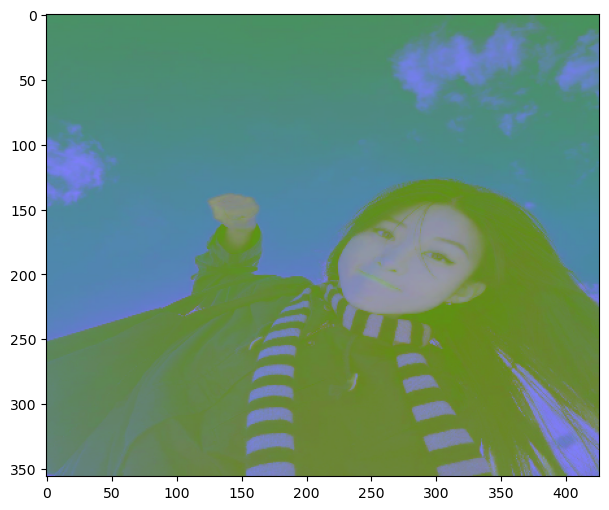

In [33]:
display_inline(img_lab)

In [32]:
from sklearn.cluster import KMeans

In [33]:
k = 3
kmeans = KMeans(n_clusters=k)
lables = kmeans.fit_predict(img_lab.reshape((-1, 3)))

In [34]:
lables = lables.reshape((h // scaler, w // scaler))

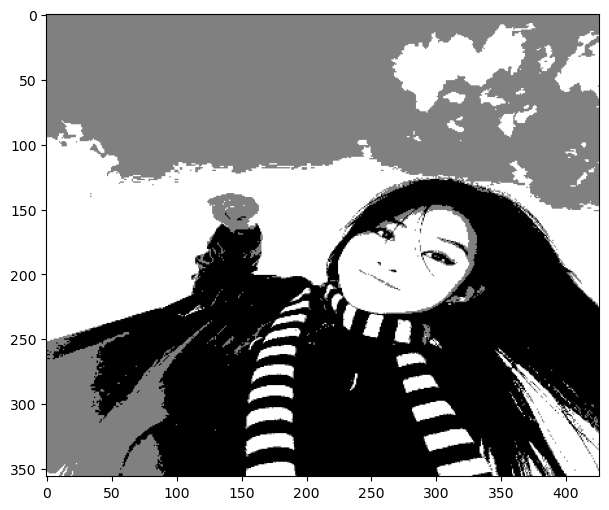

In [35]:
display_inline(lables, grey=True)

#### **Задание 8. Сравнение кластеризации в разных цветовых пространствах**
1. Выполнить кластеризацию K-means для одного и того же изображения в пространствах RGB и LAB.
2. Установить $k=4$.
3. Сравнить визуальные результаты и сделать выводы, в каком пространстве кластеры лучше разделены.

In [36]:
img_vector = img.reshape((-1, 3))

In [37]:
k = 4
kmeans = KMeans(n_clusters=k)

In [38]:
labels_rgb = kmeans.fit_predict(img_vector)

centers = np.uint8(kmeans.cluster_centers_)
img_segmented = centers[labels_rgb]
img_segmented = img_segmented.reshape(img.shape)

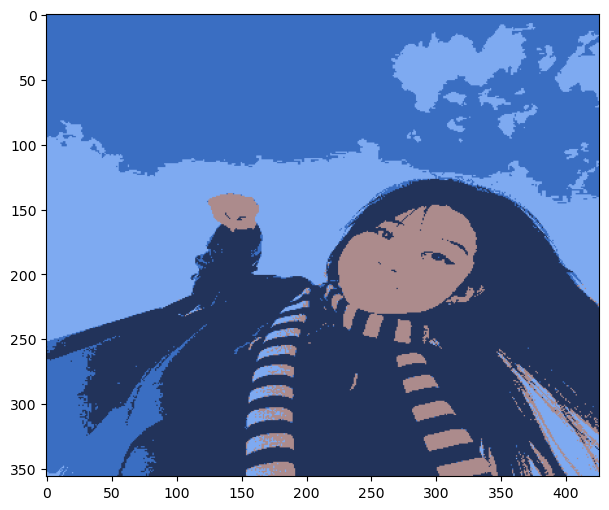

In [39]:
display_inline(img_segmented)

In [40]:
img_lab_vector = img_lab.reshape((-1, 3))

In [41]:
labels_lab = kmeans.fit_predict(img_lab_vector)

centers = np.uint8(kmeans.cluster_centers_)
img_lab_segmented = centers[labels_lab]
img_lab_segmented = img_lab_segmented.reshape(img_lab.shape)

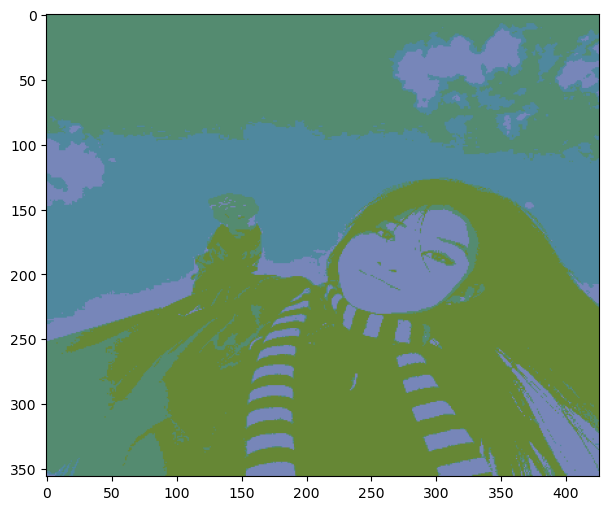

In [42]:
display_inline(img_lab_segmented)

#### **Задание 9. Использование каналов для кластеризации**
1. Выделить только канал Hue из HSV.
2. Выполнить кластеризацию K-means с $k=3$ для значений Hue.
3. Визуализировать результат кластеризации, интерпретируя выделенные цветовые зоны.

In [155]:
k = 3
kmeans = KMeans(n_clusters=k)

In [156]:
img_hue = img_hsv[:, :, 0]
img_vector_hsv = img_hue.reshape((-1, 3))

labels_hue = kmeans.fit_predict(img_vector_hsv)

centers_hue = np.uint8(kmeans.cluster_centers_)
img_hue_first_segmented = centers_hue[labels_hue]
img_hue_segmented = img_hue_first_segmented.reshape(img_hue.shape)

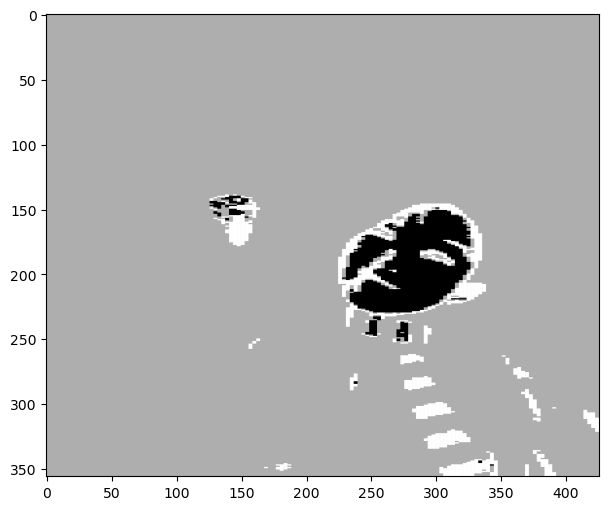

In [157]:
display_inline(img_hue_segmented, grey=True)

In [158]:
img_hue_segmented.shape

(356, 426)

In [159]:
restore_img = np.stack([img_hue_segmented, img_hsv[:, :, 1], img_hsv[:, :, 2]], axis=-1)
# restore_img = np.zeros(img_hsv.shape)
# restore_img[:, :, 0] = img_hue_segmented

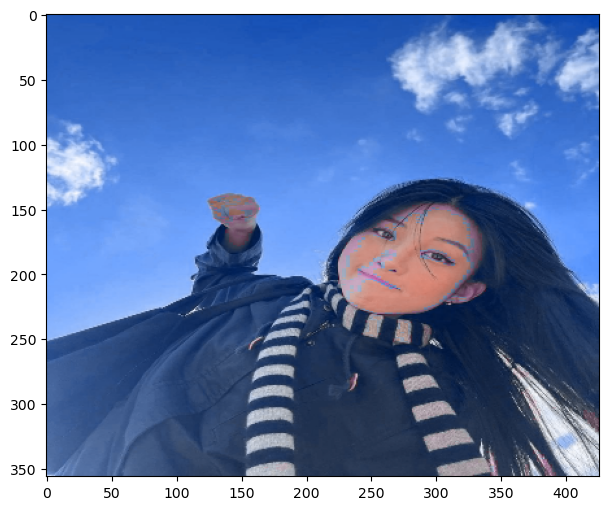

In [160]:
fig = plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(restore_img, cv2.COLOR_HSV2RGB))
plt.show()

In [161]:
img_vector_hsv = np.zeros(img_hsv.shape)
img_vector_hsv[:, :, 0] = img_hsv[:, :, 0]
img_vector_hsv = img_vector_hsv.reshape((-1, 3))

In [162]:
labels_hue = kmeans.fit_predict(img_vector_hsv)

centers_hue = np.uint8(kmeans.cluster_centers_)
img_hue_segmented = centers_hue[labels_hue]
img_hue_segmented = img_segmented.reshape(img_hsv.shape)

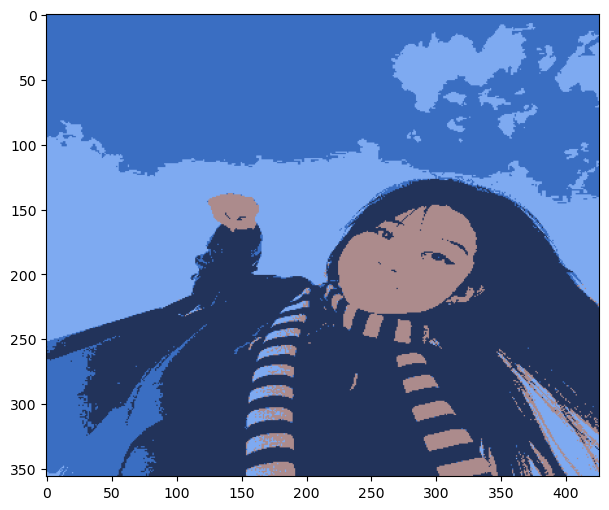

In [163]:
display_inline(img_hue_segmented)

#### **Задание 10. Сегментация объекта с использованием кластеризации**
1. Считать изображение, содержащее объект на сложном фоне.
2. Выполнить кластеризацию K-means с $k=2$ в пространстве LAB.
3. Выделить объект, сопоставив кластеры с исходным изображением.

In [165]:
path = 'example2.jpg'
img2 = cv2.imread(path)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2LAB)

In [168]:
k = 2
kmeans = KMeans(n_clusters=k)

In [169]:
img2_vector = img2.reshape((-1, 3))
labels2 = kmeans.fit_predict(img2_vector)

centers2 = np.uint8(kmeans.cluster_centers_)
img2_segmented = centers[labels2]
img2_segmented = img2_segmented.reshape(img2.shape)

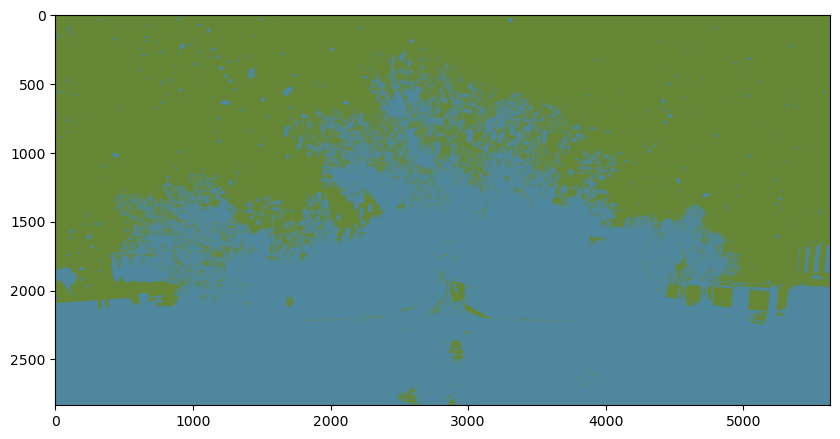

In [170]:
display_inline(img2_segmented)

### **Задание 11. Поиск и выделение текстур с помощью кластеризации**
1. Считать изображение, содержащее несколько объектов с различной текстурой.
2. Выполнить предобработку изображения: преобразовать его в градации серого и вычислить текстурные признаки (GLCM, LBP и др.).
3. Используя текстурные признаки, выполнить кластеризацию K-means с $k=4$.
4. Визуализировать области изображения, соответствующие разным текстурам.
5. Оценить качество кластеризации, добавив визуализацию текстурных признаков на изображении.